The purpose of this Python script is to intrepret a BED graph and generate plots of genome coverage, and specific gene coverage. This will get extended to compare coverage between more than one gene or more than one sample, and eventually, to incorporate variant calling

The input bed file for this notebook was generated with bedtools on the command line like this:

`bedtools genomecov -bga -ibam 8777.3.112209.CCTTAG_NZ_CP033381.1.sorted.bam > 8777.3.112209.CCTTAG_NZ_CP033381.1.depth.bed`

In [34]:
# imports

import pybedtools
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
# create bedtool objects

depth_bed = pybedtools.BedTool('../scratchspace/8777.3.112209.CCTTAG_NZ_CP033381.1.depth.bed')
annot_bed = pybedtools.BedTool('../scratchspace/NZ_CP033381.1.gff')

In [43]:
# look at annot_bed interval objects

for interval in depth_bed[0:12]:
    print(interval.start, interval.stop, interval.name)

0 2154 0
2154 2259 1
2259 3887 0
3887 3976 1
3976 4544 0
4544 4547 11
4547 4548 15
4548 4549 20
4549 4550 27
4550 4551 439
4551 4552 446
4552 4553 447


In [60]:
# fun with intervals and gene lengths

for interval in annot_bed[9640:]:
    print(interval.start, interval.stop, interval.stop - interval.start)

5229227 5229497 270 NZ_CP033381.1
5229477 5229750 273 NZ_CP033381.1
5229477 5229750 273 NZ_CP033381.1
5229926 5230445 519 NZ_CP033381.1
5229926 5230445 519 NZ_CP033381.1
5230574 5230823 249 NZ_CP033381.1
5230574 5230823 249 NZ_CP033381.1
5230899 5232186 1287 NZ_CP033381.1
5230899 5232186 1287 NZ_CP033381.1
5232329 5232770 441 NZ_CP033381.1
5232329 5232770 441 NZ_CP033381.1
5232787 5233402 615 NZ_CP033381.1
5232787 5233402 615 NZ_CP033381.1


In [74]:
# plot genome coverage of entire genome

def plot_depth_coverage(region):
    pos = []
    depth = []

    for interval in region:
        pos.append(interval.start)
        depth.append(int(interval.name))

    fig, ax = plt.subplots(figsize=(16, 4))
    sns.lineplot(x=pos, y=depth, ax=ax)
    
    return ax

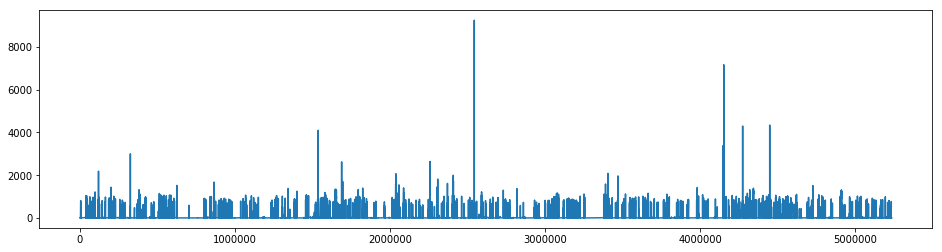

In [75]:
plot_depth_coverage(depth_bed)

In [76]:
# check hisD gene (hisD gene: 4723086..4724387)
# check trpB gene (trpB gene: 2749668..2750870)

hisD = pybedtools.BedTool('NZ_CP033381.1 4723086 4724387 hisD', from_string=True)
trpB = pybedtools.BedTool('NZ_CP033381.1 2749668 2750870 trpB', from_string=True)

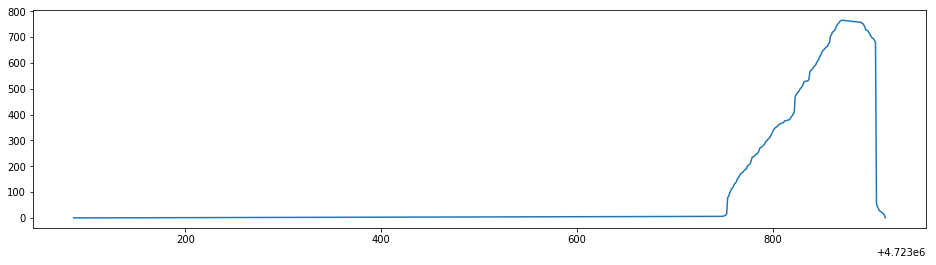

In [77]:
# get hisD coverage

hisD_coverage = depth_bed.intersect(hisD)
plot_depth_coverage(hisD_coverage)

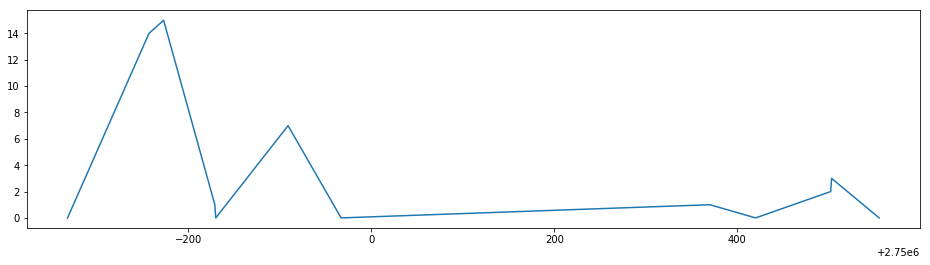

In [79]:
# get trpB coverage

trpB_coverage = depth_bed.intersect(trpB)
plot_depth_coverage(trpB_coverage)